In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

## DF Parsing

In [2]:
df_undernourishment = pd.read_csv(".\Datasets\Processed\Prevalence_of_Undernourishment_Processed.csv")
df_net_fdi = pd.read_csv(".\Datasets\Processed/Net_FDI_Processed.csv")
df_cpi = pd.read_csv(".\Datasets\Processed\CPI_Food_Processed.csv", encoding="ISO-8859-1")
df_socio_factors = pd.read_csv(".\Datasets\Processed\SocioFactors_Processed.csv", encoding="ISO-8859-1")

In [3]:
df_cpi.rename(columns={"ISO3 Code": "ISO3_Code"}, inplace=True) # remove after CPI df col naming resolved
df_undernourishment.drop("Unnamed: 0", axis=1, inplace=True)
df_net_fdi.drop("Unnamed: 0", axis=1, inplace=True)

print(df_undernourishment.columns)
print(df_net_fdi.columns)
print(df_cpi.columns)
print(df_socio_factors.columns)

Index(['M49_Code', 'Country_Name', 'Prevalence_of_undernourishment_2016',
       'Prevalence_of_undernourishment_2017',
       'Prevalence_of_undernourishment_2018',
       'Prevalence_of_undernourishment_2019',
       'Prevalence_of_undernourishment_2020'],
      dtype='object')
Index(['M49_Code', 'Country_Name', 'Total_FDI_Inflows_2016',
       'Total_FDI_Inflows_2017', 'Total_FDI_Inflows_2018',
       'Total_FDI_Inflows_2019', 'Total_FDI_Inflows_2020',
       'Total_FDI_Outflows_2016', 'Total_FDI_Outflows_2017',
       'Total_FDI_Outflows_2018', 'Total_FDI_Outflows_2019',
       'Total_FDI_Outflows_2020', 'Net_FDI_2016', 'Net_FDI_2017',
       'Net_FDI_2018', 'Net_FDI_2019', 'Net_FDI_2020'],
      dtype='object')
Index(['M49_Code', 'Country_Name', 'ISO3_Code', 'CPI_Food_2016',
       'CPI_Food_2017', 'CPI_Food_2018', 'CPI_Food_2019', 'CPI_Food_2020',
       'CPI_Food_Avg'],
      dtype='object')
Index(['ISO3_Code', 'Country_Name', 'M49_Code', 'Life_Expectancy_2016',
       'Life_Exp

In [4]:
# print(df_undernourishment.dtypes)
# print(df_net_fdi.dtypes)
print(df_cpi.dtypes)
print(df_socio_factors.dtypes)

M49_Code           int64
Country_Name      object
ISO3_Code         object
CPI_Food_2016    float64
CPI_Food_2017    float64
CPI_Food_2018    float64
CPI_Food_2019    float64
CPI_Food_2020    float64
CPI_Food_Avg     float64
dtype: object
ISO3_Code                        object
Country_Name                     object
M49_Code                        float64
Life_Expectancy_2016            float64
Life_Expectancy_2017            float64
Life_Expectancy_2018            float64
Life_Expectancy_2019            float64
Life_Expectancy_2020            float64
Life_Expectancy_Avg             float64
Mean_Years_Of_Schooling_2016    float64
Mean_Years_Of_Schooling_2017    float64
Mean_Years_Of_Schooling_2018    float64
Mean_Years_Of_Schooling_2019    float64
Mean_Years_Of_Schooling_2020    float64
Mean_Years_of_Schooling_Avg     float64
dtype: object


### Relevant Plotting Functions


In [4]:
PLOTS_TO_FUNC = {
    "Hist": sns.histplot,
    "Kde": sns.kdeplot,
    "Ecdf": sns.ecdfplot,
    "Bar": sns.barplot,
    "Scatter": sns.scatterplot,
    "Violin": sns.violinplot,
    "Line": sns.lineplot
}


In [5]:
def custom_settings(
    markersize: float = 2,
    linewidth: float = 0.5,
    labelsize: float = 6.5
):
    mpl.rcdefaults()
    mpl.rcParams["lines.markersize"] = markersize
    mpl.rcParams["lines.linewidth"] = linewidth
    mpl.rcParams["xtick.labelsize"] = labelsize
    ax = plt.gca()
    ax.set_xlim((0, 55))
    # simplefilter(action="ignore")

# custom_settings()

In [6]:
def split_cols_exceeding_thresh(
    df: pd.DataFrame,
    label_name: str,
    thresh: int = 5
) -> dict:
    """
    For the cols that exceed the categorical threshold 
        => This function will break down the unique vals of the col into n groups
            where n = n_unique values of the col / categorical threshold
    Returns dictionary where:
        keys => arbitrary names (1,2,3,4,...)
        values => list of values in the label col split according to the threshold
    """
    d = {}
    n_cuts = int(np.ceil((df[label_name].nunique()) / thresh))
    l = df[label_name].sort_values()
    col_names_l = np.array_split(l, n_cuts) 
    var_name_l = [i for i in range(0, n_cuts)]
    for j in range(len(var_name_l)):
        d[var_name_l[j]] = col_names_l[j]
    return d


In [7]:
def save_fig(
    fig,
    dest_path,
    file_name
):
    locs, labels = plt.xticks()
    plt.setp(labels, horizontalalignment="right")

    plt.savefig(os.path.join(dest_path, file_name), dpi=300, bbox_inches="tight")
    plt.close()

## Prevalence of Undernourishment EDA

In [8]:
df_undernourishment.rename(columns={'Prevalence_of_undernourishment_2016': "2016_(%)",'Prevalence_of_undernourishment_2017': "2017_(%)",'Prevalence_of_undernourishment_2018': "2018_(%)",'Prevalence_of_undernourishment_2019': "2019_(%)", 'Prevalence_of_undernourishment_2020': "2020_(%)"}, inplace=True)

print(df_undernourishment.columns)

Index(['M49_Code', 'Country_Name', '2016_(%)', '2017_(%)', '2018_(%)',
       '2019_(%)', '2020_(%)'],
      dtype='object')


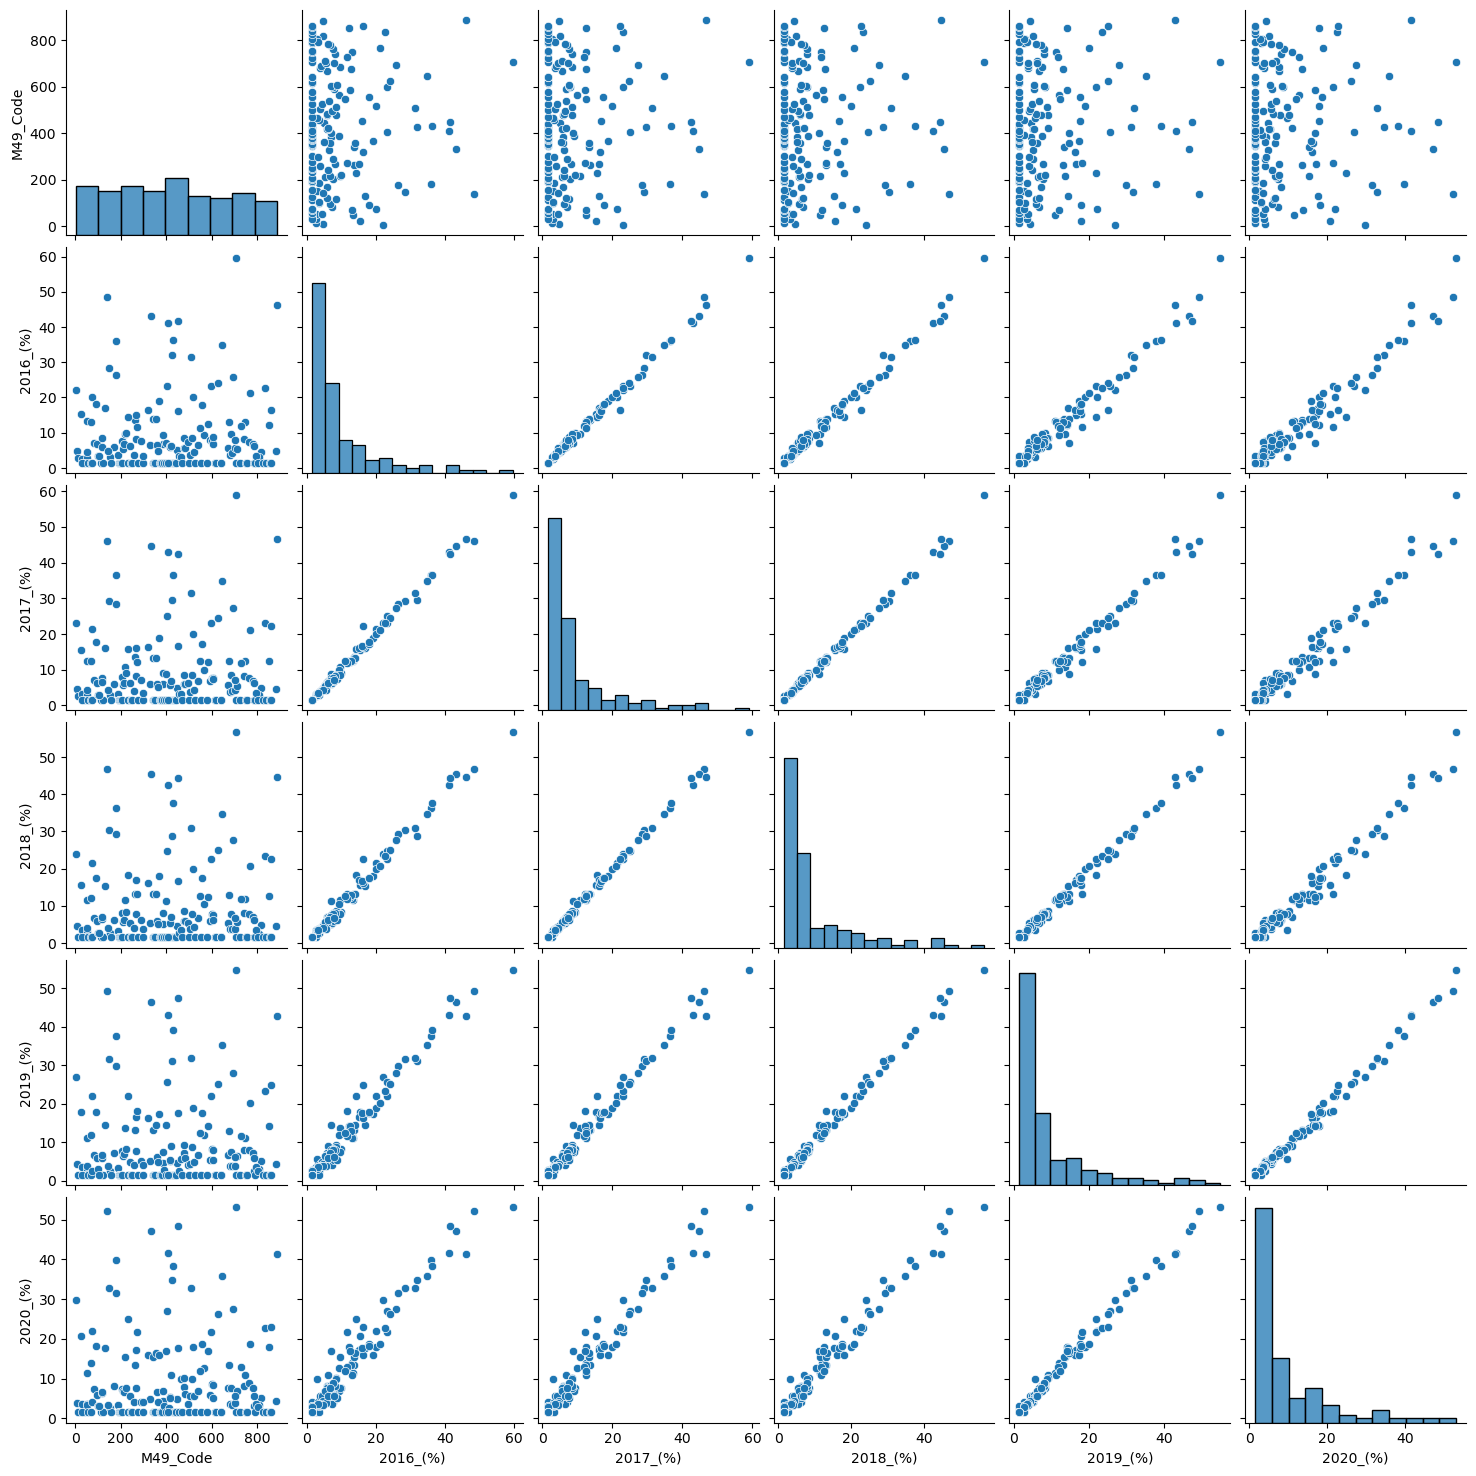

In [9]:
fig = sns.pairplot(data=df_undernourishment)

In [10]:
# cols = ['Prevalence_of_undernourishment_2016','Prevalence_of_undernourishment_2017','Prevalence_of_undernourishment_2018','Prevalence_of_undernourishment_2019', 'Prevalence_of_undernourishment_2020']
cols = ["2016_(%)", "2017_(%)", "2018_(%)","2019_(%)","2020_(%)"]

cwd = os.getcwd()
UNIVARIATE = os.path.join(cwd,"Graphs/Graphs_EDA/Univariate_Analysis")
BIVARIATE = os.path.join(cwd,"Graphs/Graphs_EDA/Bivariate_Analysis")

### Univariate Analysis

In [11]:
if not os.path.isdir(UNIVARIATE):
    os.makedirs(UNIVARIATE)

In [12]:
## Possible Univariate Plots

plot_types = ["Hist", "Kde", "Ecdf"]

for col in cols:
    for plot_type in plot_types:    
        fig = PLOTS_TO_FUNC[plot_type](data=df_undernourishment, x=col)
        file_name = f"{plot_type}_plot_Undernourishment_{col}.png"
        save_fig(fig, UNIVARIATE, file_name)

In [14]:
df = pd.read_csv(".\Datasets\Original\PrevalenceofUndernourishment_2016_2020_Percent_byCountry.csv")
df = df.replace("<2.5", "1.5")
df["Value"] = pd.to_numeric(df["Value"])

country_names_split = split_cols_exceeding_thresh(df, "Area", 7)
print(country_names_split)


# would this even work? => each 
# sns.lineplot(data=df, x="Year", y="Value", hue="Area")

{0: 0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
9            Albania
10           Albania
11           Albania
12           Albania
13           Albania
18           Algeria
17           Algeria
15           Algeria
14           Algeria
16           Algeria
19    American Samoa
20    American Samoa
21    American Samoa
22    American Samoa
23    American Samoa
24           Andorra
28           Andorra
25           Andorra
26           Andorra
27           Andorra
31            Angola
30            Angola
29            Angola
33            Angola
32            Angola
38          Anguilla
37          Anguilla
34          Anguilla
35          Anguilla
Name: Area, dtype: object, 1: 36               Anguilla
39    Antigua and Barbuda
40    Antigua and Barbuda
41    Antigua and Barbuda
42    Antigua and Barbuda
43    Antigua and Barbuda
44              Argentina
48              Argentina
47              Argentina
45              Ar

c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))
